<a href="https://colab.research.google.com/github/ZahraMohit/ML-Notebooks/blob/main/02_Cross_entropy_sparse_from_logits_flatten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [34]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7718 - loss: 0.7116
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9415 - loss: 0.2003
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9561 - loss: 0.1496
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9636 - loss: 0.1257
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9679 - loss: 0.1113
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9717 - loss: 0.0913
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9734 - loss: 0.0848
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9764 - loss: 0.0773
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9764 - loss: 0.0769
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9781 - loss: 0.0723
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9793 - loss: 0.0657
Epoch 12/100
938/938 ━━━━━━━━━━━━━━━━━━

In [38]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9793 - loss: 0.1472


[0.14722198247909546, 0.9793000221252441]

In [9]:
x_test.shape

(10000, 28, 28)

In [12]:
test_sample = x_test[12].reshape(1, 28, 28)

In [13]:
model.predict(test_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[-11.473531  , -11.424965  ,  -8.798437  ,  -0.77455145,
          3.3204517 ,  -2.516193  , -13.838698  ,  -0.9980253 ,
         -2.5733564 ,   9.786933  ]], dtype=float32)

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [19]:
prediction = probability_model.predict(test_sample).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


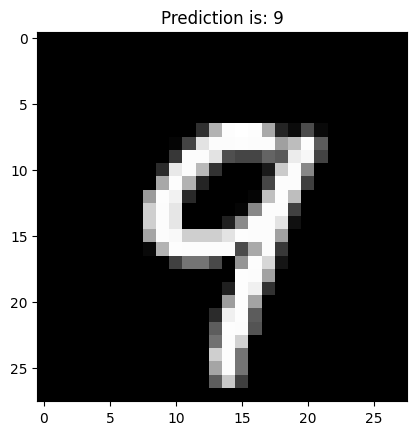

In [24]:
import matplotlib.pyplot as plt
plt.imshow(x_test[12], cmap='gray')
plt.title(f'Prediction is: {prediction}');

In [40]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
import numpy as np
predicted = model.predict(x_test)
predicted_classes = np.argmax(predicted, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


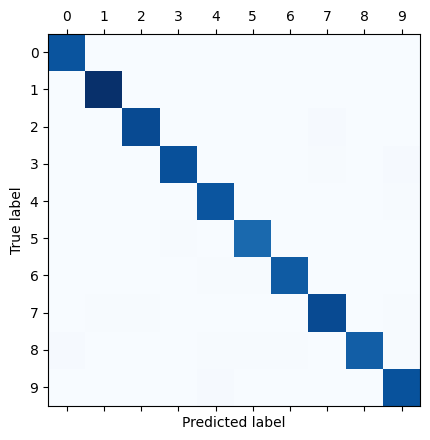

In [41]:
from sklearn.metrics import confusion_matrix
plt.matshow(confusion_matrix(y_test, predicted_classes), cmap="Blues")
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label");